# Import important libraries
- **pandas**: read and write csv files.
- **numpy**: a powerful matrix-based calculation.
- **matplotlib**: draw plots.
- **seaborn**: beautiful visualizations.
- **plotly**: create interactive plots.
- **os**: file management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Define important configurations
let's define some important configurations:
- **train_path**: location of training dataset.
- **test_path**: location of test dataset.
- **IMG_HEIGHT**: Height of input images.
- **IMG_WIDTH**: Widtch of input images.
- **BATCH_SIZE**: Mount of sample data in a training iteration.
- **EPOCHS**: Number of epochs.
- **LR**: Learning rate.
- **NUM_CLASSES**: Number of classes
- **PATIENCE**: How many epochs it must continue after the loss stopped from decreasing.
- **CLASS_LABELS**: Class labels.

In [2]:
train_path = "./fer/train"
test_path = "./fer/test"

IMG_HEIGHT = 48
IMG_WIDTH = 48

BATCH_SIZE = 64 # for model.fit()
EPOCHS = 40

LR = 0.0002
NUM_CLASSES = 7
PATIENCE = 4 # For Early stopping

CLASS_LABELS  = ['Surprise', 'Fear', 'Anger', 'Neutral', 'Sadness', 'Disgust', 'Happy']

# Data Input and Data Augumentation
To add more images to the dataset, we use **Data Augumentation Technique** such as: zoom, rotate, flip, scale, etc, to generate more data.

**ImageDataGenerator** from Keras is a powerful tool to handle these tasks.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   rescale = 1./255,
                                   validation_split = 0.2,
                                   rotation_range = 10
                                  )

train_generator = train_datagen.flow_from_directory(
                        directory = train_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        shuffle  = True , 
                        class_mode = "categorical",
                        subset = "training",
                        seed = 12
                       )

validation_generator = train_datagen.flow_from_directory(
                        directory = train_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        shuffle  = True , 
                        class_mode = "categorical",
                        subset = "validation",
                        seed = 12
                    )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


# Display some preprocessing statistics

## Classes counting

In [4]:
ctg = os.listdir(train_path)
counts = []
for e in ctg:
    counts.append(len(os.listdir(train_path + f'/{e}')))
    
counts

[3171, 4097, 3995, 4965, 4830, 436, 7215]

In [5]:
df_hist = pd.DataFrame()
df_hist['category'] = CLASS_LABELS 
df_hist['count'] = counts
df_hist

,category,count
0,Surprise,3171
1,Fear,4097
2,Anger,3995
3,Neutral,4965
4,Sadness,4830
5,Disgust,436
6,Happy,7215


## Classes counting visualization

In [6]:
px.bar(df_hist, x='category', y='count')

# Get traninng features (images) and corresponding labels

In [7]:
imgs , labels = validation_generator.next()
validation_generator.reset()
len(imgs)

64

# Let's take a brief look at images data

(48, 48, 3)


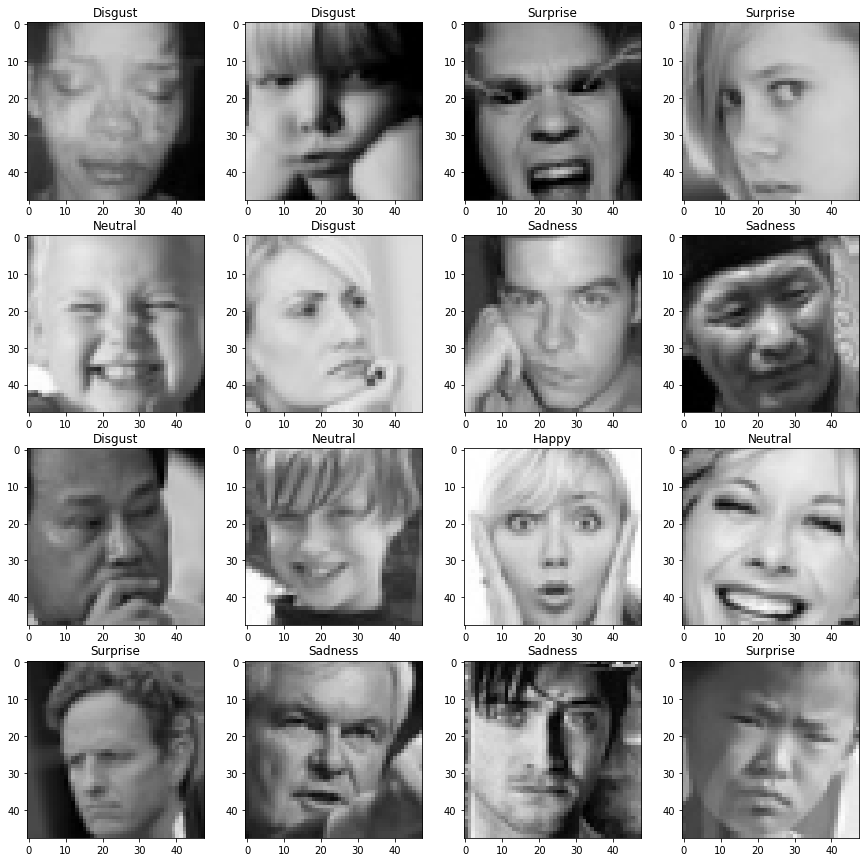

In [8]:
img = imgs[0]
print(img.shape)

plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(imgs[i])
    plt.title(CLASS_LABELS[np.argmax(labels[i])])
plt.show()

# Building model


In [9]:
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten,Dense,Dropout,Activation,BatchNormalization,GlobalAveragePooling2D
from keras.models import Model,Sequential
from keras import regularizers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


In [10]:
Simple_CNN_model = Sequential()

Simple_CNN_model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv1', 
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ))
Simple_CNN_model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv2'))
Simple_CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

Simple_CNN_model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv1'))
Simple_CNN_model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv2'))
Simple_CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))
Simple_CNN_model.add(Dropout(0.25))

Simple_CNN_model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv1'))
Simple_CNN_model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv2'))
Simple_CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

Simple_CNN_model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv1'))
Simple_CNN_model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv2'))
Simple_CNN_model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv3'))
Simple_CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))
Simple_CNN_model.add(Dropout(0.25))


Simple_CNN_model.add(Flatten())
Simple_CNN_model.add(Dense(4096, activation='relu'))
Simple_CNN_model.add(Dense(4096, activation='relu'))
Simple_CNN_model.add(Dense(NUM_CLASSES, activation='softmax'))

Simple_CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_maxpool (MaxPooling2D (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0

# Enhance model techniques
- Optimizer: After some effort to tune the learning rate range from 0.0001 to 0.01 and to choose the best optimizer between SGD and Adam , we came up with this result:
$$ Adam(LR = 0.0002) $$
- Callbacks:
    - To avoid overfitting, we use **Early Stopping** - <span style="color:blue">stop the training process after 4 epochs (patience = 4) without accuracy improvement</span>.
    - To get the best model during the training process, we use the **Checkpoint** method.


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


Simple_CNN_model.compile(
    optimizer = Adam(learning_rate = LR), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

checkpoint = ModelCheckpoint("checkpoint_weights", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          patience= PATIENCE,
                          verbose=1,
                          restore_best_weights=True
                          )

CALLBACKS = [early_stopping, checkpoint]

# Model training

In [12]:
history = Simple_CNN_model.fit(x = train_generator,
                    epochs = EPOCHS ,
                    validation_data = validation_generator , 
                    callbacks = CALLBACKS 
                   )

Epoch 1/40
359/359 [==============================] - 156s 413ms/step - loss: 1.8001 - accuracy: 0.2771 - val_loss: 1.5957 - val_accuracy: 0.3778
Epoch 2/40
359/359 [==============================] - 47s 130ms/step - loss: 1.5252 - accuracy: 0.4010 - val_loss: 1.4906 - val_accuracy: 0.4247
Epoch 3/40
359/359 [==============================] - 46s 127ms/step - loss: 1.4021 - accuracy: 0.4529 - val_loss: 1.3473 - val_accuracy: 0.4903
Epoch 4/40
359/359 [==============================] - 45s 125ms/step - loss: 1.3089 - accuracy: 0.4955 - val_loss: 1.2649 - val_accuracy: 0.5109
Epoch 5/40
359/359 [==============================] - 46s 127ms/step - loss: 1.2340 - accuracy: 0.5268 - val_loss: 1.2287 - val_accuracy: 0.5356
Epoch 6/40
359/359 [==============================] - 45s 125ms/step - loss: 1.1820 - accuracy: 0.5464 - val_loss: 1.1758 - val_accuracy: 0.5494
Epoch 7/40
359/359 [==============================] - 46s 127ms/step - loss: 1.1328 - accuracy: 0.5685 - val_loss: 1.1582 - val_a

# Saving model

In [13]:
Simple_CNN_model.save('./model/simple_CNN_model.h5')

# Evaluation
## Loss and Accuracy of Training Process

In [14]:

def plot_analysis(m):
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)

  plt.plot(m.history['loss'],color="#E74C3C")
  plt.plot(m.history['val_loss'],color='#641E16')

  plt.title('Validation loss vs Train loss',fontsize=8)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'validation'], loc='upper right')

  plt.subplot(1,2,2)

  plt.plot(m.history['accuracy'],color="#E74C3C")
  plt.plot(m.history['val_accuracy'],color='#641E16')

  plt.title('Validation accuracy vs Train accuracy',fontsize=8)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'validation'], loc='lower right')

  plt.show()


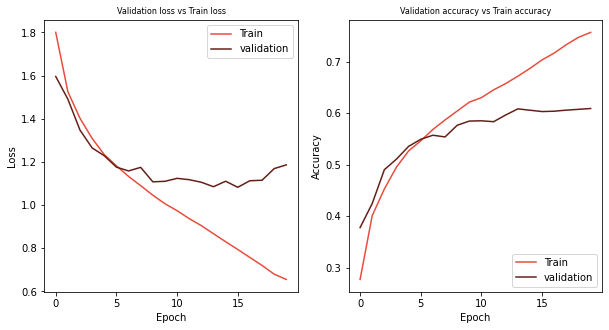

In [15]:
plot_analysis(history)

## Evaluate on test set

### Get test data

In [16]:
test_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                    )

test_generator = test_datagen.flow_from_directory(
                        directory = test_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        class_mode = "categorical",
                        shuffle = False,
                      )

Found 7178 images belonging to 7 classes.


### Evalute on test set

In [17]:
e = Simple_CNN_model.evaluate(x=test_generator, verbose=1)

113/113 [==============================] - 32s 285ms/step - loss: 1.0621 - accuracy: 0.6155


### Classification Report

In [18]:
test_generator.reset()
p = Simple_CNN_model.predict(test_generator)

In [19]:
test_generator.reset()
labels_test = [CLASS_LABELS[item] for item in test_generator.labels]
labels_pred = [CLASS_LABELS[np.argmax(item)] for item in p]

from sklearn.metrics import *
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

       Anger       0.45      0.44      0.45      1024
     Disgust       0.53      0.32      0.40      1247
        Fear       0.61      0.46      0.52       111
       Happy       0.75      0.75      0.75       831
     Neutral       0.83      0.83      0.83      1774
     Sadness       0.49      0.71      0.58      1233
    Surprise       0.55      0.57      0.56       958

    accuracy                           0.62      7178
   macro avg       0.60      0.58      0.59      7178
weighted avg       0.62      0.62      0.61      7178



### Confusion matrix

In [20]:
cfm = confusion_matrix(labels_test, labels_pred)

import plotly.figure_factory as ff

# Set up figure 
fig = ff.create_annotated_heatmap(np.flipud(cfm)
, x = CLASS_LABELS, y = list(np.flip(CLASS_LABELS)), colorscale='Purples')

# Add titles
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  xaxis = dict(title='Predicted label'),
                  yaxis = dict(title='True label'))

# Adjust margins (top, left), width and height
fig.update_layout(margin=dict(t=100, l=100), width = 750, height = 750)

# Add colorbar
fig['data'][0]['showscale'] = True

fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



# Transfer learning


In [21]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_generator = train_datagen.flow_from_directory(
                        directory = train_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        shuffle  = True , 
                        class_mode = "categorical",
                        subset = "training",
                        seed = 12
                       )

validation_generator = train_datagen.flow_from_directory(
                        directory = train_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        shuffle  = True , 
                        class_mode = "categorical",
                        subset = "validation",
                        seed = 12
                    )

test_generator = test_datagen.flow_from_directory(
                        directory = test_path,
                        target_size = (IMG_HEIGHT ,IMG_WIDTH),
                        batch_size = BATCH_SIZE,
                        class_mode = "categorical",
                        shuffle = False,
                      )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
from tensorflow.keras.applications import MobileNet
from keras.applications.vgg19 import VGG19


base_model = MobileNet(include_top=False, pooling='max', weights='imagenet', input_shape=(224,224,3))

base_model.trainable = False

x = base_model.layers[-2].output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
out = Dense(7, activation = 'softmax')(x)

pretrained_model = Model(inputs = base_model.input, outputs = out)

pretrained_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
______________________________________________________________

In [23]:
pretrained_model.compile(
    optimizer = Adam(learning_rate = LR), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

checkpoint = ModelCheckpoint("checkpoint_weights", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          patience= PATIENCE,
                          verbose=1,
                          restore_best_weights=True
                          )

CALLBACKS = [early_stopping, checkpoint]

Epoch 1/40
359/359 [==============================] - 322s 894ms/step - loss: 1.5727 - accuracy: 0.3926 - val_loss: 1.4502 - val_accuracy: 0.4503
Epoch 2/40
359/359 [==============================] - 320s 892ms/step - loss: 1.3811 - accuracy: 0.4760 - val_loss: 1.3837 - val_accuracy: 0.4686
Epoch 3/40
359/359 [==============================] - 318s 885ms/step - loss: 1.3260 - accuracy: 0.5043 - val_loss: 1.3468 - val_accuracy: 0.4842
Epoch 4/40
359/359 [==============================] - 320s 893ms/step - loss: 1.2869 - accuracy: 0.5168 - val_loss: 1.3456 - val_accuracy: 0.4801
Epoch 5/40
359/359 [==============================] - 323s 899ms/step - loss: 1.2638 - accuracy: 0.5224 - val_loss: 1.3073 - val_accuracy: 0.5076
Epoch 6/40
359/359 [==============================] - 319s 890ms/step - loss: 1.2360 - accuracy: 0.5364 - val_loss: 1.2953 - val_accuracy: 0.5069
Epoch 7/40
359/359 [==============================] - 316s 881ms/step - loss: 1.2226 - accuracy: 0.5409 - val_loss: 1.2892 -

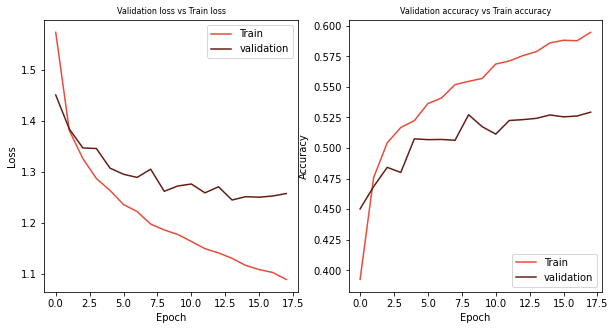

In [24]:
history = pretrained_model.fit(x = train_generator,
                    epochs = EPOCHS ,
                    validation_data = validation_generator , 
                    callbacks = CALLBACKS 
                   )

pretrained_model.save('/kaggle/working/pretrained_model.h5')

plot_analysis(history)

# Evaluate


In [25]:
e = pretrained_model.evaluate(x=test_generator, verbose=1)

p = pretrained_model.predict(test_generator)

113/113 [==============================] - 23s 202ms/step - loss: 1.2248 - accuracy: 0.5379


In [26]:
test_generator.reset()
labels_test = [CLASS_LABELS[item] for item in test_generator.labels]
labels_pred = [CLASS_LABELS[np.argmax(item)] for item in p]

from sklearn.metrics import *
print(classification_report(labels_test, labels_pred))
test_generator.reset()

              precision    recall  f1-score   support

       Anger       0.36      0.33      0.34      1024
     Disgust       0.44      0.42      0.43      1247
        Fear       0.57      0.14      0.23       111
       Happy       0.66      0.69      0.68       831
     Neutral       0.71      0.78      0.74      1774
     Sadness       0.50      0.49      0.49      1233
    Surprise       0.43      0.44      0.44       958

    accuracy                           0.54      7178
   macro avg       0.52      0.47      0.48      7178
weighted avg       0.53      0.54      0.53      7178



# Confusion Matrix


In [27]:
cfm = confusion_matrix(labels_test, labels_pred)

import plotly.figure_factory as ff

# Set up figure 
fig = ff.create_annotated_heatmap(np.flipud(cfm)
, x = CLASS_LABELS, y = list(np.flip(CLASS_LABELS)), colorscale='Purples')

# Add titles
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  xaxis = dict(title='Predicted label'),
                  yaxis = dict(title='True label'))

# Adjust margins (top, left), width and height
fig.update_layout(margin=dict(t=100, l=100), width = 750, height = 750)

# Add colorbar
fig['data'][0]['showscale'] = True

fig.show()

# Fine Tunning


In [28]:
base_model.trainable = True
finetunned_model = Model(inputs = base_model.input, outputs = out)

finetunned_model.compile(
    optimizer = Adam(learning_rate = LR), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

checkpoint = ModelCheckpoint("checkpoint_weights", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          patience= PATIENCE,
                          verbose=1,
                          restore_best_weights=True
                          )

CALLBACKS = [early_stopping, checkpoint]
history = finetunned_model.fit(x = train_generator,
                    epochs = EPOCHS ,
                    validation_data = validation_generator , 
                    callbacks = CALLBACKS 
                   )

finetunned_model.save('/kaggle/working/finetunned_model.h5')

Epoch 1/40
359/359 [==============================] - 334s 921ms/step - loss: 1.2171 - accuracy: 0.5424 - val_loss: 1.5019 - val_accuracy: 0.4990
Epoch 2/40
359/359 [==============================] - 333s 927ms/step - loss: 0.9556 - accuracy: 0.6428 - val_loss: 1.3164 - val_accuracy: 0.5078
Epoch 3/40
359/359 [==============================] - 331s 921ms/step - loss: 0.8241 - accuracy: 0.6947 - val_loss: 1.2683 - val_accuracy: 0.5691
Epoch 4/40
359/359 [==============================] - 320s 891ms/step - loss: 0.7237 - accuracy: 0.7322 - val_loss: 1.0633 - val_accuracy: 0.6255
Epoch 5/40
359/359 [==============================] - 320s 890ms/step - loss: 0.6335 - accuracy: 0.7689 - val_loss: 1.1625 - val_accuracy: 0.6015
Epoch 6/40
359/359 [==============================] - 323s 898ms/step - loss: 0.5476 - accuracy: 0.7980 - val_loss: 1.3100 - val_accuracy: 0.5687
Epoch 7/40
359/359 [==============================] - 321s 893ms/step - loss: 0.4754 - accuracy: 0.8261 - val_loss: 1.5078 -

# Evaluate


In [29]:
e = finetunned_model.evaluate(x=test_generator, verbose=1)

test_generator.reset()
p = finetunned_model.predict(test_generator)

113/113 [==============================] - 22s 197ms/step - loss: 1.0607 - accuracy: 0.6322


In [30]:
test_generator.reset()
labels_test = [CLASS_LABELS[item] for item in test_generator.labels]
labels_pred = [CLASS_LABELS[np.argmax(item)] for item in p]

from sklearn.metrics import *
print(classification_report(labels_test, labels_pred))
test_generator.reset()

              precision    recall  f1-score   support

       Anger       0.51      0.39      0.44      1024
     Disgust       0.47      0.62      0.54      1247
        Fear       0.47      0.48      0.48       111
       Happy       0.86      0.62      0.72       831
     Neutral       0.81      0.88      0.84      1774
     Sadness       0.60      0.58      0.59      1233
    Surprise       0.56      0.55      0.55       958

    accuracy                           0.63      7178
   macro avg       0.61      0.59      0.59      7178
weighted avg       0.64      0.63      0.63      7178



# Confusion Matrix


In [31]:
cfm = confusion_matrix(labels_test, labels_pred)

import plotly.figure_factory as ff

# Set up figure 
fig = ff.create_annotated_heatmap(np.flipud(cfm)
, x = CLASS_LABELS, y = list(np.flip(CLASS_LABELS)), colorscale='Purples')

# Add titles
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  xaxis = dict(title='Predicted label'),
                  yaxis = dict(title='True label'))

# Adjust margins (top, left), width and height
fig.update_layout(margin=dict(t=100, l=100), width = 750, height = 750)

# Add colorbar
fig['data'][0]['showscale'] = True

fig.show()